# 作業
- 作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [2]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

載入 相關套件 並 執行 hierarchical clustering 實驗 ...

In [3]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

### 1. 建立階層分群模型 Hierarchical Clustering
***
- 階層分群依照距離計算方式可分為以下幾種:
    1. single
    2. complete
    3. average
    4. ward


- 建立幾個常見的Hierarchical Clustering模型演算法，供後續比較使用


- Refernce & Study:
    1. [Hierarchical Clustering](http://mirlab.org/jang/books/dcpr/dcHierClustering.asp?title=3-2%20Hierarchical%20Clustering%20(%B6%A5%BCh%A6%A1%A4%C0%B8s%AAk)&language=chinese)
    2. [Hierarchical Clustering BLOG](https://www.jamleecute.com/hierarchical-clustering-%E9%9A%8E%E5%B1%A4%E5%BC%8F%E5%88%86%E7%BE%A4/)
    3. [Hierarchical Clustering video](https://www.youtube.com/watch?v=Tuuc9Y06tAc)

In [4]:
estimators = [('hc_single', AgglomerativeClustering(n_clusters=3, linkage='single')), 
              ('hc_complete', AgglomerativeClustering(n_clusters=3, linkage='complete')),
              ('hc_average', AgglomerativeClustering(n_clusters=3, linkage='average'))]

### 建立3D圖形空間 Axes3D
***
- 目的 : 我們想透過在3維空間中，來觀察資料分群的結果
- 方法 : 
    1. 建立figure，可看成視窗，視窗內可以擁有1個或多個子圖
    2. 透過mpl_toolkits.mplot3d中的Axes3D建立3維圖像空間
    3. 透過散布圖來觀察，更改成3維空間後，散布圖的變數增加到了3個變數，並且用顏色來代表分群的類別

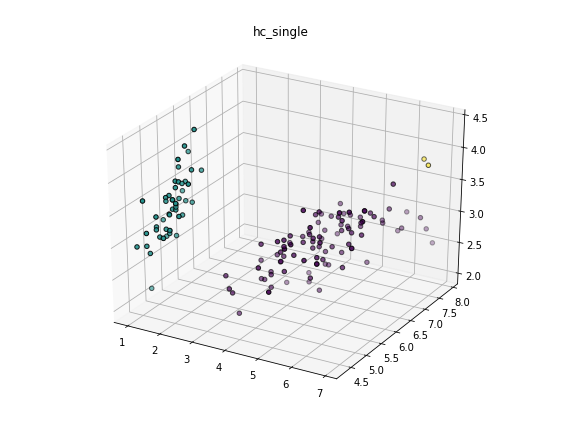

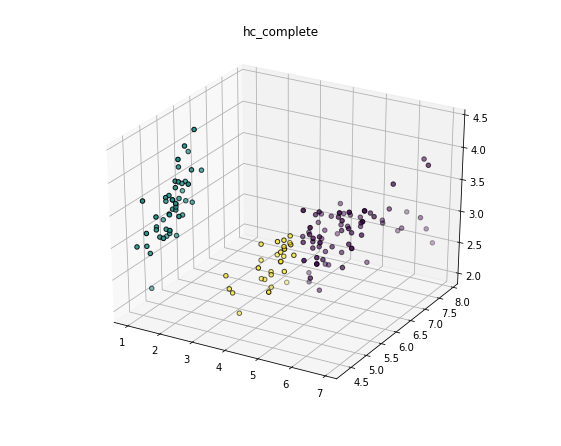

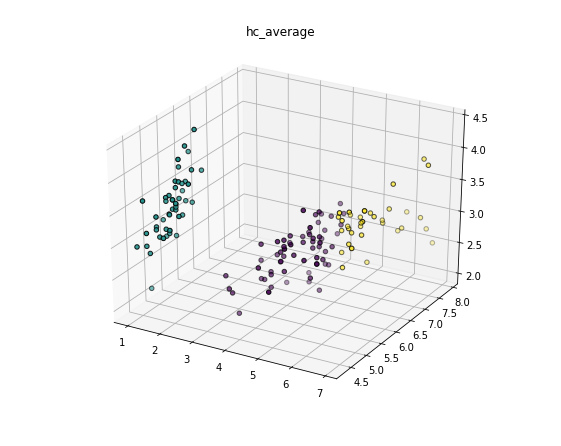

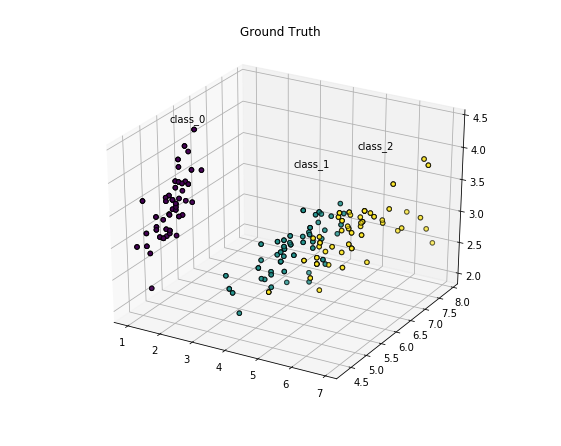

In [5]:
# 有3個模型要執行，因此要產生3個 figure，依序編號生成
fig_num = 1

for name, estimator in estimators:
    fig = plt.figure(num=fig_num, figsize=(8, 6))  # num:視窗編號
    ax = Axes3D(fig, rect=[0, 0, .95, 1])
    
    estimator.fit(X)
    labels = estimator.labels_
    
    ax.scatter(X[:, 2], X[:, 0], X[:, 1], 
               c=labels.astype(np.float), edgecolor='k')
    
    ax.dist = 12  # 3D圖框往內縮12
    fig_num += 1
    
    ax.set_title(name)

# 建立Ground Truth3D散布圖
label_name = [('class_0', 0),
              ('class_1', 1),
              ('class_2', 2)]
fig = plt.figure(num=fig_num, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1])
ax.set_title('Ground Truth')

# 在圖上加入分群類別為多少(class_0、class_1、class_2)
for name, label in label_name:
    ax.text(X[y==label, 2].mean(),              # The position of label name(x,y,z value)
            X[y==label, 0].mean(),
            X[y==label, 1].mean()+ 1.3,
            name)
    ax.scatter(X[:, 2], X[:, 0], X[:, 1],       # The position of data
           c=y, edgecolor='k')
    ax.dist = 12